<center><h1 style = "font-size: 48px;">Wavelets</h1></center>

## Outline 
1. Background
2. Wavelet Transforms
3. More Examples
3. An EEG based real-time epilepsy seizure detection approach using discrete wavelet transform and machine learning methods(2022).

### Background

### Fourier Transform
- The Fourier Transform decomposes/breaks apart input signals into a set of orthogonal basis functions.
- This decomposition completely transforms the input into the frequency domain, eliminating temporal information. 
- FT: $$\int_{-\infty}^{\infty}x(t)e^{-j \omega t}dt$$
<!-- - Short Time Fourier Transform and Gabor transform provide a window size localizing the transform in time. 
- Wavelet Transform builds upon this by allowing for multiresolution transforms in time and frequency [1]. -->

### Short-Time Fourier Transform
- To address the loss of temporal information the Short-Time Fourier Transform was introduced. 
- STFT: $$\int_{-\infty}^{\infty}x(t)\omega(t-\tau)e^{-j \omega t}dt$$
- The STFT uses window set by the window function $\omega(t-\tau)$ 
- Essentially this breaks apart the input signal into subsections and takes the Fourier Transform of that subsection

### Problem
- The STFT is good for capturing some temporal information however its fixed window has a major drawback.  
<img src="seismic_graph.png" alt="drawing" width="600"/>
- Depending on the window size chose either low frequency information is entirely lost, or we fail to get good temporal localization.

### Wavelet Transform 
- The wavelet transform builds upon this idea by introducing a multiresolution transform of the input signal. 
- Essentially the concept of a window still applies however now the scale of the window size is varied continously. 
- As a result of its multiresolution nature the wavelet transform is also better at capturing transients within an input signal.

### Haar Wavelets
- Originally introduced by Alfréd Haar in his 1909 thesis.
- Wavelet transformations did not come into fruition until decades later but Haar's wavelet is credited as the original and most basic wavelet.
- Haar's Wavelet defined as $$\Psi(t) = \left\{ \begin{array}{ll}
    1 & 0\leq t < \frac{1}{2} \\
    -1 & \frac{1}{2}\leq t <1 \\
    0 & otw \\
    \end{array}
    \right.$$

In [1]:
from matplotlib import pyplot as plt
import numpy as np

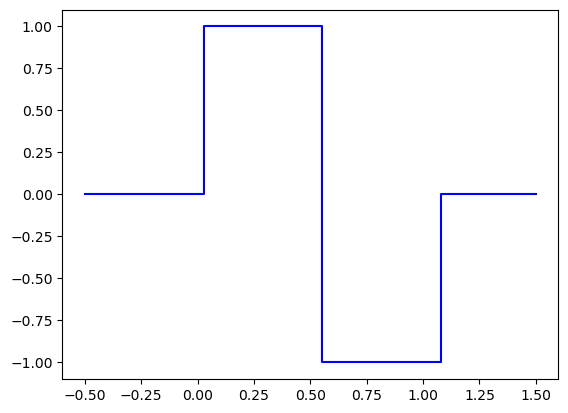

In [2]:
# HAAR plot
def Haar(t):
    if(t>= 0 and t<1/2):
        return 1
    elif(t>=1/2 and t<1):
        return -1
    else:
        return 0
x  = np.linspace(-0.5,1.5,20)
y = [Haar(j) for j in x]
plt.plot(x,y,color='blue',drawstyle='steps-post')
plt.show()

### The Mother Wavelet 
- In wavelet transformations the original or base wavelet is referred to as the mother wavelet. 
- Subsequent shifted and/or scaled wavelets are reffered to as child wavelets. 
- Mother wavelet is $\psi (t)$ 
- Child wavelets are defined as: $$\psi_{a,b}(t) = \frac{1}{\sqrt a} \psi(\frac{t-b}{a})$$
    - where $a,b \in \mathbb{R}, a \neq 0$
    - a is the scaling factor
    - b is the translation
- This scaling allows us to capture both high and low frequency content

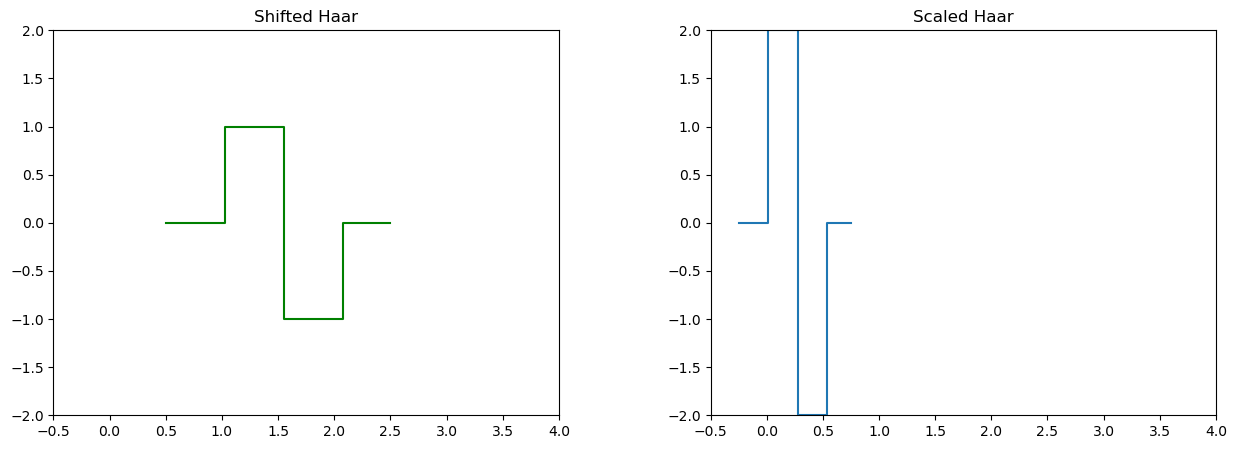

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot: Shifted Haar
shift_x = [j + 1 for j in x]
# ax1.hlines([0],-0.5,4, color="grey")
ax1.plot(shift_x, y, color="green", label='Shifted Haar', drawstyle='steps-post')
ax1.set_title('Shifted Haar')
ax1.set_xlim([-1/2,4])
ax1.set_ylim([-2,2])

# Second subplot: Scaled Haar
scaled_x = [j * 0.5 for j in x]
scaled_y = [j * 2 for j in y]
ax2.plot(scaled_x, scaled_y, label="Scaled Haar", drawstyle='steps-post')
ax2.set_title('Scaled Haar')
ax2.set_xlim([-1/2,4])
ax2.set_ylim([-2,2])
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

### Inifinite Wavelets
- The Haar wavelet is not the only wavelet and there are infinitely many possible wavelets that can be used in the transform. 
- Some other wavelet examples include: the Mexican Hat(Ricker), Morlet, Daubechies, and many more. 
- Each wavelet has its own strengths and weaknesses when used in a wavelet transformation and the choice of wavelet is highly domain dependent. 
- There are also families of wavelets, with some being discrete or continuous.

### Morlet and Mexican Hat Formulas 
- Morlet: $$\psi (t) = \pi^{\frac{1}{4}}e^{\frac{-1}{2}t^2}(e^{j\sigma t})$$
  
- Mexican Hat: $$\psi(t) = \frac{2}{\sqrt{3 \sigma}\pi^{\frac{1}{4}}}(1-(\frac{t}{\sigma})^2)e^{\frac{-t^2}{2 \sigma^2}}$$

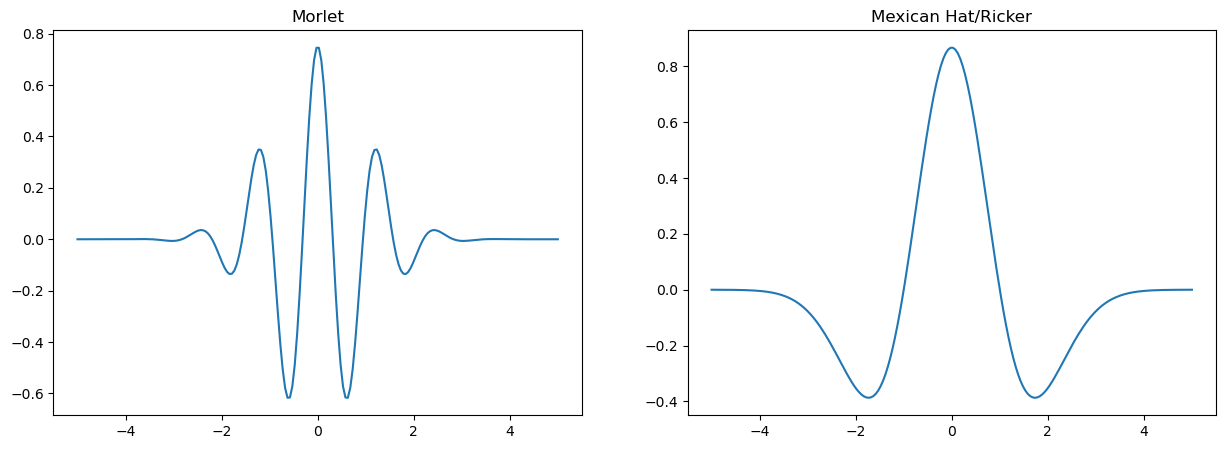

In [4]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
x = np.linspace(-5,5,200)

# Morlet Wavelet 
def morlet(t):
    return np.pi**-0.25 * np.exp(-1/2*(t)**2)*np.exp(1j*5*t)
ax1.set_title("Morlet")
ax1.plot(x, np.real(morlet(x)), label = "Morlet")

# Mexican Hat Wavelet
def mexican_hat(t):
    return 2/(np.sqrt(3*1)*np.pi**0.25)*(1-(t/1)**2)*np.exp(-(t**2)/(2*1**2))
ax2.set_title("Mexican Hat/Ricker")
ax2.plot(x, mexican_hat(x), label = "Mexican Hat")
    
plt.show()


### Debauchie Family of Wavelets
<!-- ![](debauchie_wavelet.png "Debauchie Wavelets")   -->
<img src="debauchie_wavelet.png" alt="drawing" width="900"/>
Image Source: (https://www.mathworks.com/help/wavelet/gs/introduction-to-the-wavelet-families.html)

### Wavelet Criteria 
- While there are infinitely many possible wavelets they must all satisfy these criteria: 
1. Finite Energy: $$\int|\psi(t)|^2dt <\infty$$ 

2. Zero Mean: $$\int \psi(t)dt = 0$$
3. Localized

### Wavelet Criteria 2
- In the Fourier domain these criteria are 
1. Admissability Condition $$\int \frac{|\psi(\omega)|^2}{|\omega|}d\omega<+\infty$$
2. $$|\psi(\omega)|^2 = 0 \text{ when  } \omega = 0 $$ 
Where $\psi(\omega)$ is the Fourier transform of $\psi(t)$ [1].

### Wavelet Transforms


### Continuous Wavelet Transform
$$CWT(a,b) = \int f(t) \psi(t)^*_{a,b}dt$$
- \* complex conjugate
### Inverse Continous Wavelet Transform
$$f(t) = \int \int CWT(a,b)\psi_{a,b}(t)da \ db$$

### Discrete Wavelets and the Discrete Wavelet Transform
- In order to discretize the wavelet we must create a fixed interval for the scale and translation steps a,b. 
- Discrete wavelet: $$\psi_{j,k}(t) = \frac{1}{\sqrt{s^j}}\psi(\frac{t-ks^j}{s^j})$$
- Most often s is set to 2, translating and scaling by a power of 2 
- Visually we can represent this as:  
![](Discrete_wavelet.png "Discrete Wavelet")  
Image Source: [1].  
- The Discrete Wavelet Transform is therefore: $$DWT(j,k)=\sum f(t)\psi^*_{j,k}(t)$$

### More Examples

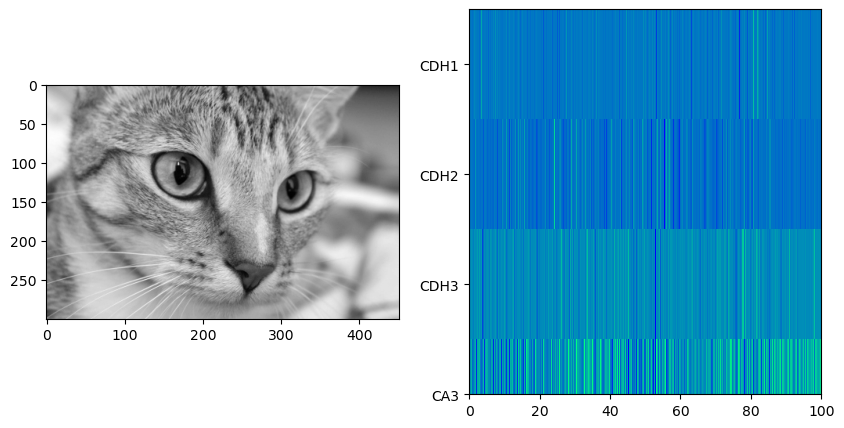

In [84]:
# DWT of Image 
from skimage import data 
from skimage.color import rgb2gray
import pywt 
image = rgb2gray(data.cat())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image, cmap='gray')
coeffs = pywt.wavedec2(image, wavelet='db4', level=3)
# iterate over the coefficients and plot the horizontal detail coefficients
for i, ci in enumerate(coeffs):
    if(i>0):
        ax2.imshow(ci[0].reshape(1,-1), extent=[0,100,i+0.5, i+1.5], cmap='winter', aspect='auto', interpolation='nearest')
    else:
        ax2.imshow(ci.reshape(1,-1), extent=[0,100,i+0.5, i+1.5], cmap='winter', aspect='auto', interpolation='nearest')
ax2.set_yticks(range(1,5))
ax2.set_yticklabels(['CA3', 'CDH3', 'CDH2','CDH1'])
plt.show()

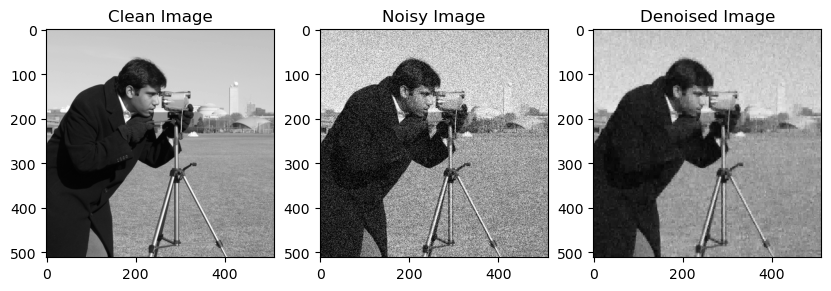

In [6]:
from skimage.util import random_noise
from skimage import data, img_as_float
from skimage.restoration import denoise_wavelet
# Denoising Example 
clean_image = img_as_float(data.camera())
noisy_image = random_noise(clean_image, var=0.15**2) # add noise to image
denoised_image = denoise_wavelet(noisy_image, wavelet='db1')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,5))
ax1.imshow(clean_image, cmap='gray')
ax1.set_title("Clean Image")

ax2.imshow(noisy_image, cmap='gray')
ax2.set_title("Noisy Image")

ax3.imshow(denoised_image, cmap='gray')
ax3.set_title("Denoised Image")

plt.show()

### An EEG based real-time epilepsy seizure detection approach using discrete wavelet transform and machine learning methods(2022).

- In this paper the authors propose using the DWT with a db4 wavelet to decompose an EEG signal into the detail and approximation coefficients. 
- Using these coefficients they are able to construct features from which they can use a SVM model to make multiclass predictions.
    - The three classes used are healthy, seizure free, and active seizure based on the University of Bonn EEG dataset. 
![](EEG_Framework.png)

![](EEG_graphs.png)

In [86]:
# loading and splitting the data 1-80 training 81-100 testing 
import os 
def get_list(ground_class:list)->list:
    data_list = []
    for letter in ground_class:
        files = os.listdir(letter)
        files.sort()
        for file_name in files:
            if os.path.isfile(os.path.join(letter, file_name)):
                with open(os.path.join(letter, file_name), 'r') as file:
                    lines = file.readlines()
                    file_data = [int(x.strip()) for x in lines]
                    # cast to ints, it is being read in as a single string atm 
                    data_list.append(file_data)
    return data_list

def get_train_test()->list:
    healthy_classes = ['Z', 'O']
    seizure_free = ['N', 'F']
    seizure_active = ['S']
    health = get_list(healthy_classes)
    sf = get_list(seizure_free)
    sa = get_list(seizure_active)
    train_x  = health[:81]+health[101:180]+sf[:81]+sf[101:180]+sa[:80]
    test_x = health[80:101]+health[180:]+sf[81:100]+sf[180:]+sa[80:] 
    return train_x,test_x
train_set, test_set = get_train_test()
train_y = np.concatenate((np.zeros((160,1)),np.ones((160,1)),np.full((80,1),2))) 
test_y = np.concatenate((np.zeros((40,1)),np.ones((40,1)),np.full((20,1),2))) 

In [92]:
 # feature extraction functions 
from collections import Counter
from scipy import stats
def shannon_entropy(input):
    counts = Counter(input)
    probs = np.array(list(counts.values()))/len(input)
    SE = -np.sum(probs*np.log2(probs))
    return SE
def log_entropy(input):
    counts = Counter(input)
    probs = np.array(list(counts.values()))/len(input)
    LE = -np.sum(np.log2(probs)**2)
    return LE
# fuzzy approximate entropy, measure from: https://link.springer.com/article/10.1007/s10439-010-9933-5
# m and n fixed to 2, distance measure used in EEG paper is not specified
def fuzzy_approx_en(data):
    N = len(data)
    r = 0.15 * np.std(data)
    n = 2 
    m = 2
    def phi(m):
        sum = 0
        for i in range(1,N-m+1):
            X_i = data[i:i+m]
            dist_sum = 0
            for j in range(1, N-m+1):
                if(j != i):
                    X_j = data[j:j+m]
                    dist = np.max(X_i-1/m*np.sum(X_i)-(X_j-1/m*np.sum(X_j)))
                    dist_sum+= 0 if dist < r else 1
            sum += 1/(N-m-1)*dist_sum
        return 1/(N-m)*sum
    return np.log(phi(m))-np.log(phi(m+1))
def mean_band_power(input):
    return np.sum(input**2)/len(input)
# iterate through input_seq take the DWT and using the returned coeffiecients extract the features  
def preprocess_feat_extract(input_seq:list):
    overall_features = []
    for x in input_seq:
        coeffs = pywt.wavedec(x, wavelet ='db4', level=4) # take the DWT 
        # paper takes subsection of features depending on the coefficient being used
        x_features = []
        x_features.append(np.std(coeffs[2]))
        x_features.append(np.std(coeffs[0]))
        x_features.append(np.mean(coeffs[2]))
        x_features.append(np.mean(coeffs[1]))
        x_features.append(log_entropy(coeffs[3]))
        x_features.append(log_entropy(coeffs[2]))
        # x_features.append(fuzzy_approx_en(coeffs[2]))
        x_features.append(np.max(coeffs[3]))
        x_features.append(np.max(coeffs[2]))
        x_features.append(stats.kurtosis(coeffs[3]))
        x_features.append(stats.kurtosis(coeffs[2]))
        overall_features.append(x_features)
    return overall_features

In [93]:
# train and test
processed_train = preprocess_feat_extract(train_set)
processed_test = preprocess_feat_extract(test_set)

In [94]:
# %conda install sklearn
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.exceptions import ConvergenceWarning
# Ignoring the warnings here as the SVM does not converge within reasonable number of epochs using the paper's settings otherwise
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
averages = []
model = SVC(C=1.0,decision_function_shape='ovo', gamma=0.1, kernel='poly', cache_size=2000, max_iter=5000)
for i in range(1,20):
    shuffled_train, shuffled_y = shuffle(processed_train, train_y, random_state=i)
    model = model.fit(shuffled_train, shuffled_y.ravel())
    averages.append(model.score(processed_test, test_y))
print("ACC Mean: " + str(np.mean(averages)))
print("ACC STD: " + str(np.std(averages)))

ACC Mean: 0.9473684210526315
ACC STD: 0.010178462950428256


# References 
[1] C. Valens(1999). A Really Friendly Guide to Wavelets. http://agl.cs.unm.edu/~williams/cs530/arfgtw.pdf  
R. Polikar (1999). The story of wavelets. In *Physics and Modern Topics in Mechanical and Electrical Engineering* (pp. 192-197). World Scientific and Engineering Academy and Society.  
A. Graps (1995). An introduction to wavelets, In *IEEE Computational Science and Engineering*, vol. 2, no. 2, pp. 50-61.  
I. Daubechies (1992). Ten Lectures on Wavelets, In *Society for Industrial and Applied Mathmatics*.  
Mingkan Shen, Peng Wen, Bo Song, Yan Li(2022) An EEG based real-time epilepsy seizure detection approach using discrete wavelet transform and machine learning methods, *Biomedical Signal Processing and Control*,Volume 77.